<a href="https://colab.research.google.com/github/Mark4815/Covid19-Data_Data_Cleaning_and_Query/blob/main/SQLAnalysis_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Creation | Upload of data, import of relative libraries and creation of dataframe.**

In [51]:
#upload the data-set to Colab
from google.colab import files
uploaded = files.upload()

Saving COVID-19 Coronavirus.csv to COVID-19 Coronavirus (2).csv


In [52]:
#import pandas library & duckdb library
import pandas as pd
import duckdb

In [53]:
#create a dataframe from the upload.
df = pd.read_csv('COVID-19 Coronavirus.csv')

**Cleaning | Use of analytical queries, including Pandas.**

In [54]:
#test data output
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,TotalCases1,TotalDeaths1,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [55]:
#This states that there is 1 blank within 'Other Names' so need to determine if this is an issue.
#All data types look effective compared to the column content.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   TotalCases1              225 non-null    int64  
 6   TotalDeaths1             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [56]:
#Calculating how many null values we have with the other names column.
null_other_names = df['Other names'].isnull().sum()
print(f"Number of null values in 'Other Names': {null_other_names}")

#Display the rows with a null in Other Names.
rows_with_null_other_names = df[df['Other names'].isnull()]
print("\nRows with null values in 'Other names':")
rows_with_null_other_names

Number of null values in 'Other Names': 1

Rows with null values in 'Other names':


,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,TotalCases1,TotalDeaths1,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
135,Montenegro,NaN,MNE,628205,Europe,233326,2705,371417,4306,1.159322


In [57]:
#To determine if the 'Other names' column is required, compared how many times the columns do not match (As they appear to be the same content, based off the head())
CounterMatch = 0
CounterDiff = 0

for index, row in df.iterrows():
  if row['Country'] == row['Other names']:
    CounterMatch += 1
  else:
    CounterDiff += 1

print(f"Number of rows where 'Country' matches 'Other names': {CounterMatch}")
print(f"Number of rows where 'Country' does not match 'Other names': {CounterDiff}")

Number of rows where 'Country' matches 'Other names': 191
Number of rows where 'Country' does not match 'Other names': 34


In [58]:
#Taking a look at the non-matches.
rows_where_country_other_names_differ = df[df['Country'] != df['Other names']]
print("\nRows where 'Country' does not match 'Other names':")
rows_where_country_other_names_differ


Rows where 'Country' does not match 'Other names':


,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,TotalCases1,TotalDeaths1,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
23,Bolivia,Bolivia (Plurinational State of),BOL,11951714,Latin America and the Caribbean,902448,21896,75508,1832,2.426289
28,Brunei,Brunei Darussalam,BRN,444812,Asia,135974,213,305689,479,0.156648
36,CAR,Central African Republic,CAF,4976719,Africa,14649,113,2944,23,0.771384
37,Caribbean Netherlands,"Bonaire, Sint Eustatius and Saba",BES,26650,Latin America and the Caribbean,8574,33,321726,1238,0.384885
40,Channel Islands,Guernsey,GGY,176668,Europe,69036,156,390767,883,0.225969
52,Czechia,Czech Republic,CZE,10743762,Europe,3830631,39720,356545,3697,1.036905
67,Falkland Islands,Falkland Islands (Malvinas),FLK,3657,Latin America and the Caribbean,123,0,33634,0,0.000000
89,Hong Kong,"China, Hong Kong Special Administrative Region",HKG,7603455,Asia,1171422,8172,154064,1075,0.697614
94,Iran,United Kingdom,IRN,85874667,Asia,7167646,140315,83466,1634,1.957616
100,Ivory Coast,CÃ´te d'Ivoire,CIV,27520953,Africa,81761,796,2971,29,0.973569


In [59]:
#Given the analysis above, the 'Other names' column is largely redundant and may make trended analysis difficult so choosing to drop to simplify the data.
#Shape then shows that the column has dropped. In order to retain the original data, created dataframe as 'df_2'.

print(df.shape)
df_2 = df.drop('Other names', axis=1)
print(df_2.shape)

(225, 10)
(225, 9)


**Querying | Querying the data with the use of Duckdb library.**

In [60]:
#testing use of Windows Functions (SQL) using Dataframe and Duckdb library
#This tells us what the mortality rate was compared to the number of confirmed cases.

request = duckdb.query("SELECT Country, round(sum(TotalDeaths1/TotalCases1)*100,2) AS 'DeathRatioPerCasesConfirmed' FROM df GROUP BY Country ORDER BY DeathRatioPerCasesConfirmed DESC")
print(request)

┌────────────────────────┬─────────────────────────────┐
│        Country         │ DeathRatioPerCasesConfirmed │
│        varchar         │           double            │
├────────────────────────┼─────────────────────────────┤
│ Yemen                  │                       18.15 │
│ Western Sahara         │                        10.0 │
│ Sudan                  │                        7.92 │
│ Peru                   │                        5.98 │
│ Mexico                 │                        5.71 │
│ Syria                  │                        5.64 │
│ Somalia                │                        5.11 │
│ Egypt                  │                        4.83 │
│ Afghanistan            │                        4.31 │
│ Bosnia and Herzegovina │                        4.18 │
│   ·                    │                          ·  │
│   ·                    │                          ·  │
│   ·                    │                          ·  │
│ Samoa                  │     

In [61]:
#Invoking a Windows Function to structure the data further. This takes the row number, partitions by continent, then orders by mortality rate.

request = duckdb.query("SELECT Continent, Country, round(sum(TotalDeaths1/TotalCases1)*100,2) AS 'DeathRatioPerCasesConfirmed', ROW_NUMBER() OVER (PARTITION BY Continent) AS 'ID' FROM df GROUP BY Continent, Country ORDER BY Continent,DeathRatioPerCasesConfirmed DESC")
print(request)

┌───────────┬──────────────────┬─────────────────────────────┬───────┐
│ Continent │     Country      │ DeathRatioPerCasesConfirmed │  ID   │
│  varchar  │     varchar      │           double            │ int64 │
├───────────┼──────────────────┼─────────────────────────────┼───────┤
│ Africa    │ Western Sahara   │                        10.0 │    57 │
│ Africa    │ Sudan            │                        7.92 │    54 │
│ Africa    │ Somalia          │                        5.11 │    29 │
│ Africa    │ Egypt            │                        4.83 │     9 │
│ Africa    │ Liberia          │                        3.97 │    18 │
│ Africa    │ Niger            │                         3.5 │    24 │
│ Africa    │ Malawi           │                        3.07 │    19 │
│ Africa    │ Gambia           │                        3.04 │    43 │
│ Africa    │ Tunisia          │                        2.73 │    55 │
│ Africa    │ South Africa     │                        2.69 │    30 │
│   · 

In [62]:
#Amalgamated view of mortality rate per continent.

request = duckdb.query("SELECT Continent, round(avg(TotalDeaths1/TotalCases1)*100,2) AS 'AverageDeathRatioPerCasesConfirmed' FROM df GROUP BY Continent ORDER BY AverageDeathRatioPerCasesConfirmed DESC")
request

┌─────────────────────────────────┬────────────────────────────────────┐
│            Continent            │ AverageDeathRatioPerCasesConfirmed │
│             varchar             │               double               │
├─────────────────────────────────┼────────────────────────────────────┤
│ Africa                          │                               1.99 │
│ Asia                            │                               1.56 │
│ Latin America and the Caribbean │                               1.54 │
│ Europe                          │                               0.99 │
│ Northern America                │                               0.71 │
│ Oceania                         │                               0.46 │
└─────────────────────────────────┴────────────────────────────────────┘

In [63]:
#This creates an example CTE which can be used in the query, with variable inputs for Continent and population based on requirements. This then provides all countries in the given continent above the population threshold given.
continent_filter = 'Asia'
population_threshold = 100000000

request = duckdb.query(f"""
WITH ContinentCountries AS (
    SELECT
        Continent,
        Country,
        Population
    FROM df
    WHERE Continent = '{continent_filter}'
)
SELECT
    Country,
    Population
FROM ContinentCountries
WHERE Population > {population_threshold}
""")
request


┌─────────────┬────────────┐
│   Country   │ Population │
│   varchar   │   int64    │
├─────────────┼────────────┤
│ Bangladesh  │  167561502 │
│ China       │ 1439323776 │
│ India       │ 1403754381 │
│ Indonesia   │  278586508 │
│ Japan       │  125798669 │
│ Pakistan    │  228397520 │
│ Philippines │  112133868 │
└─────────────┴────────────┘

**Ease of Use | Use of Input boxes and error handling.**

In [65]:
#Wrapping input boxes around the required inputs to make this more user-friendly. Also putting the population into int() to mitigate random inputs.

continent_filter = input("Enter the continent: ")
population_threshold = int(input("Enter the minimum population threshold: "))

request = duckdb.query(f"""
WITH ContinentCountries AS (
    SELECT
        Continent,
        Country,
        Population
    FROM df
    WHERE Continent = '{continent_filter}'
)
SELECT
    Country,
    Population
FROM ContinentCountries
WHERE Population > {population_threshold}
""")
request

Enter the continent: Asia
Enter the minimum population threshold: 10000


┌─────────────┬────────────┐
│   Country   │ Population │
│   varchar   │   int64    │
├─────────────┼────────────┤
│ Afghanistan │   40462186 │
│ Armenia     │    2972939 │
│ Azerbaijan  │   10299156 │
│ Bahrain     │    1804995 │
│ Bangladesh  │  167561502 │
│ Bhutan      │     786480 │
│ Brunei      │     444812 │
│ Cambodia    │   17123941 │
│ China       │ 1439323776 │
│ Cyprus      │    1222745 │
│   ·         │       ·    │
│   ·         │       ·    │
│   ·         │       ·    │
│ Syria       │   18244381 │
│ Taiwan      │   23892241 │
│ Tajikistan  │    9912437 │
│ Thailand    │   70106601 │
│ Timor-Leste │    1362386 │
│ Turkey      │   85927644 │
│ UAE         │   10099567 │
│ Uzbekistan  │   34318156 │
│ Vietnam     │   98871712 │
│ Yemen       │   30975258 │
├─────────────┴────────────┤
│    49 rows (20 shown)    │
└──────────────────────────┘

In [66]:
#In the case of error, 'try' included with except print statements in case of incorrect inputs.

try:
  continent_filter = input("Enter the continent: ")
  population_threshold = int(input("Enter the minimum population threshold: "))

  request = duckdb.query(f"""
  WITH ContinentCountries AS (
      SELECT
          Continent,
          Country,
          Population
      FROM df
      WHERE Continent = '{continent_filter}'
  )
  SELECT
      Country,
      Population
  FROM ContinentCountries
  WHERE Population > {population_threshold}
  """)
  request
except ValueError:
  print("Invalid input. Please enter an integer for the population threshold.")
except Exception as e:
  print(f"An error occurred: {e}")


Enter the continent: Asias
Enter the minimum population threshold: 10000


**Visualisations**

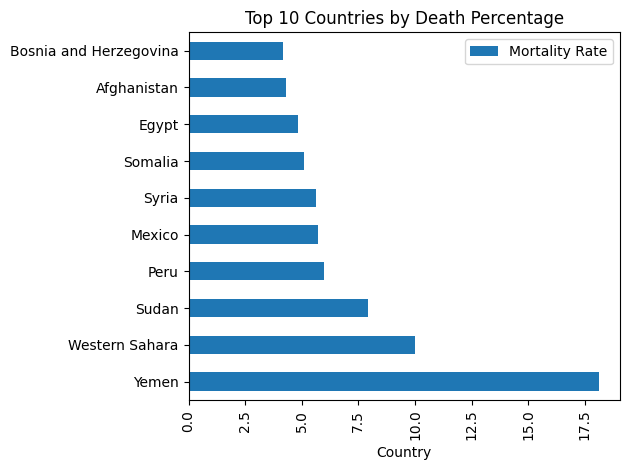

In [77]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'Death percentage' in descending order and select the top 10
df_top_10 = df.sort_values(by='Death percentage', ascending=False).head(10)

# Create a horizontal bar plot using the top 10 DataFrame
# Specify the label for the legend using the 'label' argument
df_top_10.plot(kind='barh', x='Country', y='Death percentage', label='Mortality Rate')

# Add a title to the plot (optional)
plt.title('Top 10 Countries by Death Percentage')

# Add labels to the axes (optional)
plt.xlabel('Country')
plt.ylabel('')

# Add a legend to the plot
plt.legend()

# Rotate x-axis labels for better readability if there are many countries
plt.xticks(rotation=90)

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()

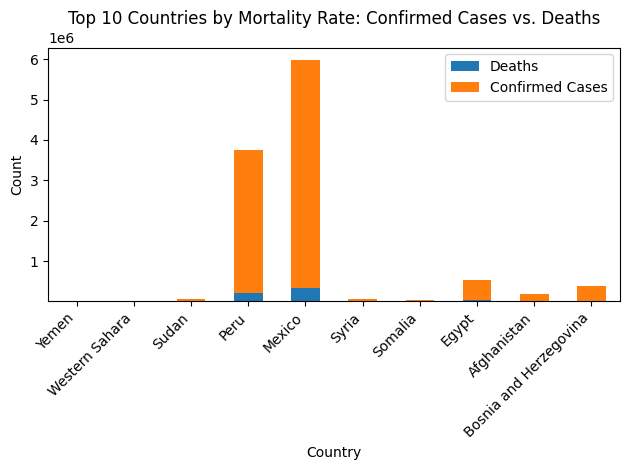

In [78]:
#This now shows the top 10 countries by mortality rate, but in a stacked bar, where it takes the volume of deaths proportionally to the number of total cases confirmed. What this tells us is whilst Yemen has the highest mortality rate, this may well be because overall volumes are low.
# Calculate the mortality rate for each country (Deaths per Confirmed Cases)
df['MortalityRate'] = (df['TotalDeaths1'] / df['TotalCases1']) * 100

# Sort the DataFrame by 'MortalityRate' in descending order and select the top 10
df_top_10_mortality = df.sort_values(by='MortalityRate', ascending=False).head(10)

# Create a stacked bar plot showing confirmed cases and deaths for the top 10 by mortality rate
# We need to ensure both 'TotalCases1' and 'TotalDeaths1' are treated as numeric
df_top_10_mortality['TotalCases1'] = pd.to_numeric(df_top_10_mortality['TotalCases1'], errors='coerce')
df_top_10_mortality['TotalDeaths1'] = pd.to_numeric(df_top_10_mortality['TotalDeaths1'], errors='coerce')

# Plotting the stacked bar chart
df_top_10_mortality.plot(kind='bar', x='Country', y=['TotalDeaths1', 'TotalCases1'], stacked=True)

# Add a title to the plot
plt.title('Top 10 Countries by Mortality Rate: Confirmed Cases vs. Deaths')

# Add labels to the axes
plt.xlabel('Country')
plt.ylabel('Count')

# Add a legend
plt.legend(['Deaths', 'Confirmed Cases'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()


In [79]:
#Export of revised data (df_2) to machine for onward analysis via Tableau.
#Not sending directly to Postgresql so credentials are not needed in the logic for these purposes.
output_path = 'df_2.csv'
df_2.to_csv(output_path, index=False)

# To download the file to your local machine
files.download(output_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>